### Importing the libraries to use K-means

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

### Import the dataset
    Import news headlines using pandas

In [76]:
dataset = pd.read_csv('news_headlines/news_headlines.csv')
X = dataset.iloc[1:, :].values

### Extract features
    Tokenize groups of n-gram words, excluding prepositions and articles. 
    Also it might be interesting to check for **synonymous words**, to reduce dimmensionality.



In [77]:
# tokenize n-gram 
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))
tokens = vectorizer.fit_transform(X[:, 1])

### Train 
    Train K-Means with different number of clusters to find the suitest.

In [81]:
# Run this and go watch some netflix, get some sleep, and check it tomorrow
wcss = []
for i in range(2,25):
    print (i)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, n_jobs=-1)
    kmeans.fit(tokens)
    wcss.append(kmeans.inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


### Elbow method
Plot the result for each number of clusters to find suitest of clusters by applying Elbow method

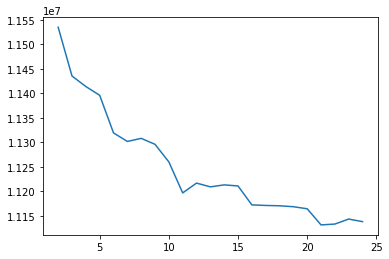

In [85]:
# Using vetorized words, ngrams = 1, 2
plt.plot(range(2, 25), wcss)
plt.show()

In [86]:
# Find clusters using best number of clusters
kmeans = KMeans(n_clusters=21, init='k-means++', max_iter=300, n_init=10, random_state=0, n_jobs=-1)
kmeans.fit(tokens)
y_kmeans = kmeans.fit_predict(X)

### Word Clouds

In [92]:
sorted_indexes = np.argsort(y_kmeans)

# separate clusters
cluster = dict()
for i in sorted_indexes:
    if not(y_kmeans[i] in cluster):
        print (y_kmeans[i])
        cluster[y_kmeans[i]] = []
    cluster[y_kmeans[i]].append(i)




0
1
2
3
4
5
6
7
8
9
10


In [ ]:
# make word clouds out of each cluster
wordclouds = []
for i in cluster:
    wordclouds.append(WordCloud().generate(" ".join(X[cluster[i], 1])))

# show word cloud
plt.imshow(wordclouds[0], interpolation='bilinear')
plt.axis("off")
plt.show()